In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [2]:
diabete=load_diabetes()
df = pd.DataFrame(diabete.data, columns=diabete.feature_names)
df['target']=diabete.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
input=diabete.data
output=df['target']

In [4]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
diabete_scaled=SS.fit_transform(input)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(diabete_scaled, output, test_size=0.2)

In [6]:
kernel = 1.0 * RBF(length_scale=1.0)

gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, random_state=42)

In [7]:
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=0.1, kernel=1**2 * RBF(length_scale=1),
                         random_state=42)

In [8]:
# 테스트 데이터에 대한 예측 수행
y_pred, sigma = gpr.predict(X_test, return_std=True)

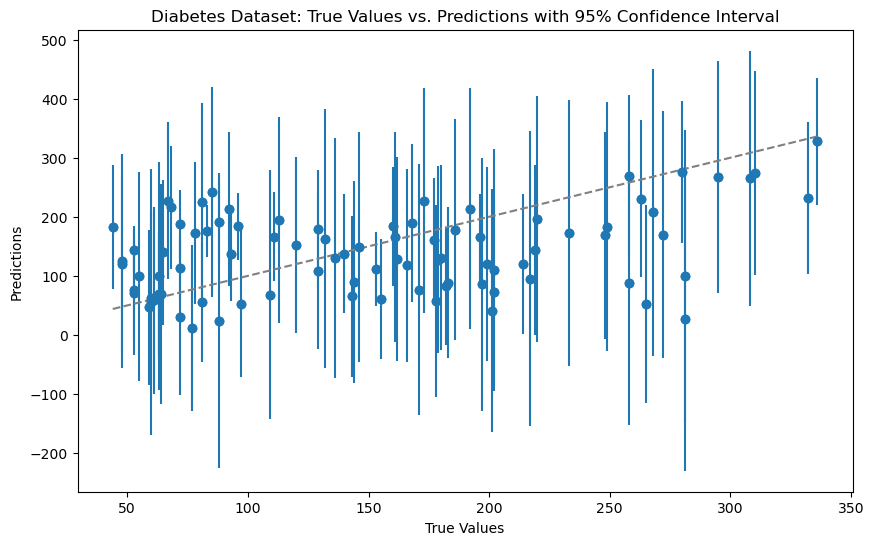

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.errorbar(y_test, y_pred, yerr=1.96 * sigma, fmt='o')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Diabetes Dataset: True Values vs. Predictions with 95% Confidence Interval')
plt.show()

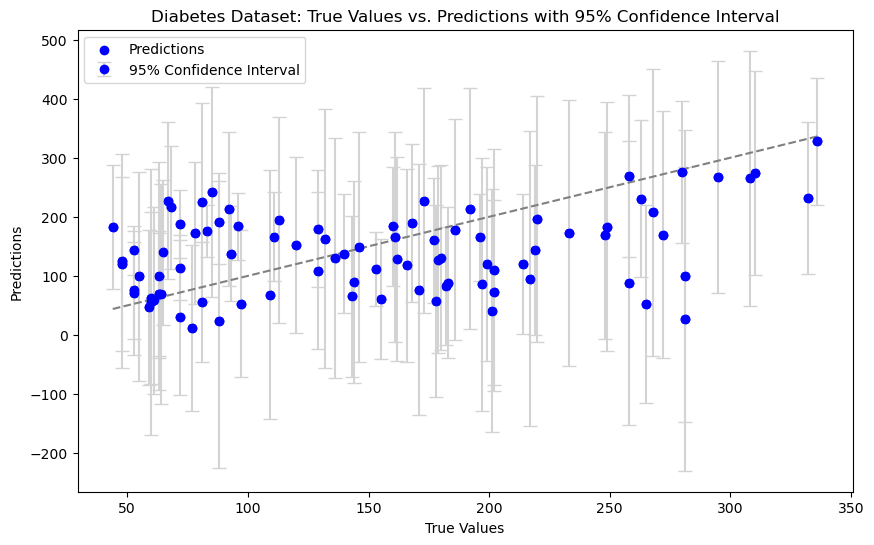

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.errorbar(y_test, y_pred, yerr=1.96 * sigma, fmt='o', color='blue', ecolor='lightgray', capsize=5, label='95% Confidence Interval')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')  # 대각선: 실제값과 예측값이 같은 경우

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Diabetes Dataset: True Values vs. Predictions with 95% Confidence Interval')
plt.legend()
plt.show()